In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset from the "Dataset" folder
df = pd.read_excel('Dataset/Aqar_Riyadh.xlsx')

# Display the summary of the dataset, including the number of non-null values and data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_ID    1200 non-null   object 
 1   Property Type  1200 non-null   object 
 2   Bedrooms       1132 non-null   object 
 3   Bathrooms      1129 non-null   float64
 4   Area           1200 non-null   object 
 5   Price          1200 non-null   object 
 6   Description    1200 non-null   object 
 7   Location       1200 non-null   object 
 8   District       1200 non-null   object 
 9   City           1192 non-null   object 
 10  Agency_Name    821 non-null    object 
dtypes: float64(1), object(10)
memory usage: 103.3+ KB


In [55]:
# Take a random sample of 10 rows from the dataset
sample_df = df.sample(n=10, random_state=80)

# Display the sample
sample_df


,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
643,L299443289,شقة,2,2.0,68 م2,"700,000","شقة للبيع في الرمال, شرق الرياض",الرمال، شرق الرياض، الرياض,حي الرمال,الرياض,شركة نهضة التطور العقارية
12,T771872957,شقة,3,3.0,893 م2,"590,000",شقة 3 غرف نوم للبيع في ظهرة لبن، الرياض,ظهرة لبن، غرب الرياض، الرياض,حي ظهرة لبن,الرياض,شركة صروح السعودية للتطوير والاستثمار العقاري
1122,S738734364,فیلا,4,4.0,250 م2,"2,400,000",فيلا للبيع في حي اليرموك، شرق الرياض,اليرموك، شرق الرياض، الرياض,حي اليرموك,الرياض,سكن المعالي للعقارات
63,Z104757533,فیلا,5,4.0,200 م2,"1,300,000",للبيع فيلا في حي الجنادرية مخطط المعالي,الجنادرية، شرق الرياض، الرياض,حي الجنادرية,الرياض,شركة قمة الوطن العقارية
588,Q597766326,دور,4,3.0,158 م2,"800,000",دور للبيع في السعادة، شرق الرياض,السعادة، شرق الرياض، الرياض,حي السعادة,الرياض,مساكن ركاز للعقارات
799,Q837162721,فیلا,5,5.0,400 م2,"1,850,000",فيلا 200 م للبيع في المهدية، الرياض,المهدية، غرب الرياض، الرياض,حي المهدية,الرياض,NaN
53,U008630173,ارض سكنية,NaN,NaN,450 م2,"2,700,000",أرض سكنية للبيع في العارض، شمال الرياض,العارض، شمال الرياض، الرياض,حي العارض,الرياض,NaN
957,C324114034,دور,3,3.0,503 م2,"1,680,000","دور للبيع في المونسية, شرق الرياض",المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,شركة مباشر للعقارات للتسويق العقاري
1123,N785395709,فیلا,5,5.0,250 م2,"2,400,000",لليع فيلا درج داخلي في اليرموك، شرق الرياض,اليرموك، شرق الرياض، الرياض,حي اليرموك,الرياض,سكن المعالي للعقارات
254,X011560087,شقة,3,5.0,163 م2,"530,000",شقة للبيع في عكاظ، جنوب الرياض,عكاظ، جنوب الرياض، الرياض,حي عكاظ,الرياض,شركة نجمة التميز للعقارات


In [ ]:
# The 'Location' column will be dropped as it contains redundant information.

# The 'City' column will be dropped because all values are "الرياض" and our recommendation system will focus only on properties in Riyadh, making it unnecessary.

# The 'Description' column will be dropped because it contains redundant and inconsistent information in its writing.


In [59]:
# Display a summary statistics for all columns in the dataset, including both numerical and categorical columns
# This will provide count, unique values, top values, frequency, mean, std, min, max, and percentiles for each column
df.describe(include="all")

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
count,1200,1200,1132,1129.000000,1200,1200,1200,1200,1200,1192,821
unique,1190,8,15,NaN,317,288,664,108,108,1,151
top,P184680884,شقة,3,NaN,500 م2,"860,000",شقة للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,شركة نجمة التميز للعقارات
freq,3,395,472,NaN,94,74,32,130,130,1192,198
mean,NaN,NaN,NaN,3.955713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.533834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The 'Property_ID' contains 10 non-unique values, which will be handled appropriately.

# Rows without 'Agency_Name' will be dropped because without an agency, it would be difficult for someone interested in the property to contact the company.

# 8 rows without a 'City' value will be dropped because they lack important location data.


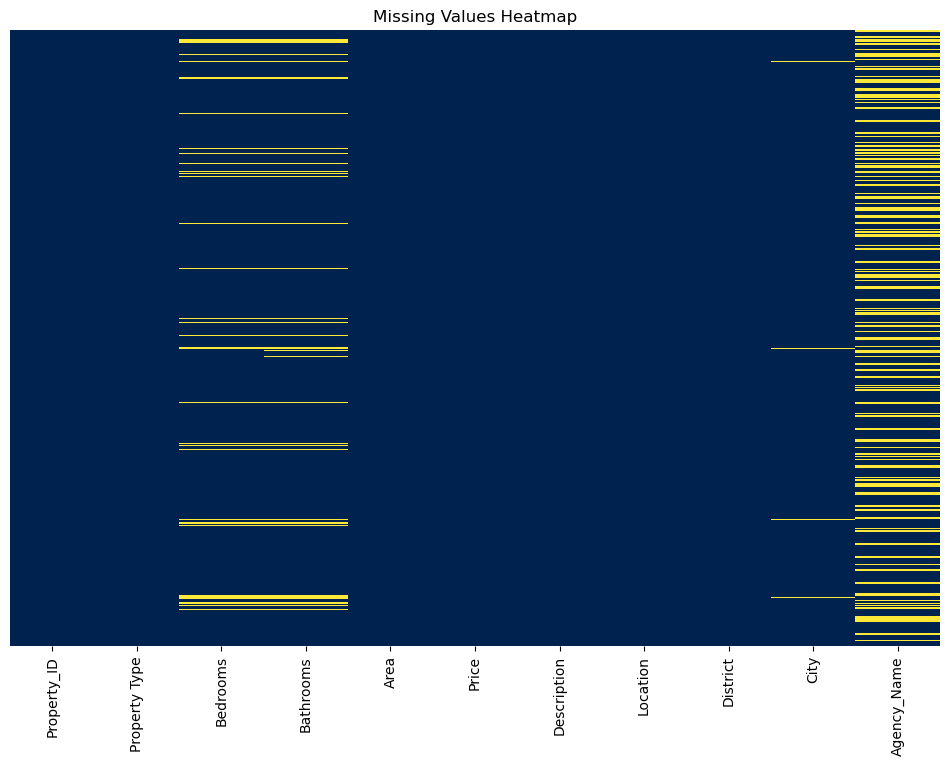

In [4]:
# Generate a heatmap to visualize missing values in the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='cividis', cbar=False, yticklabels=False)

# Add a title to the plot
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

Non-numeric Price values: 0 missing values
Non-numeric Area values: 37 missing values


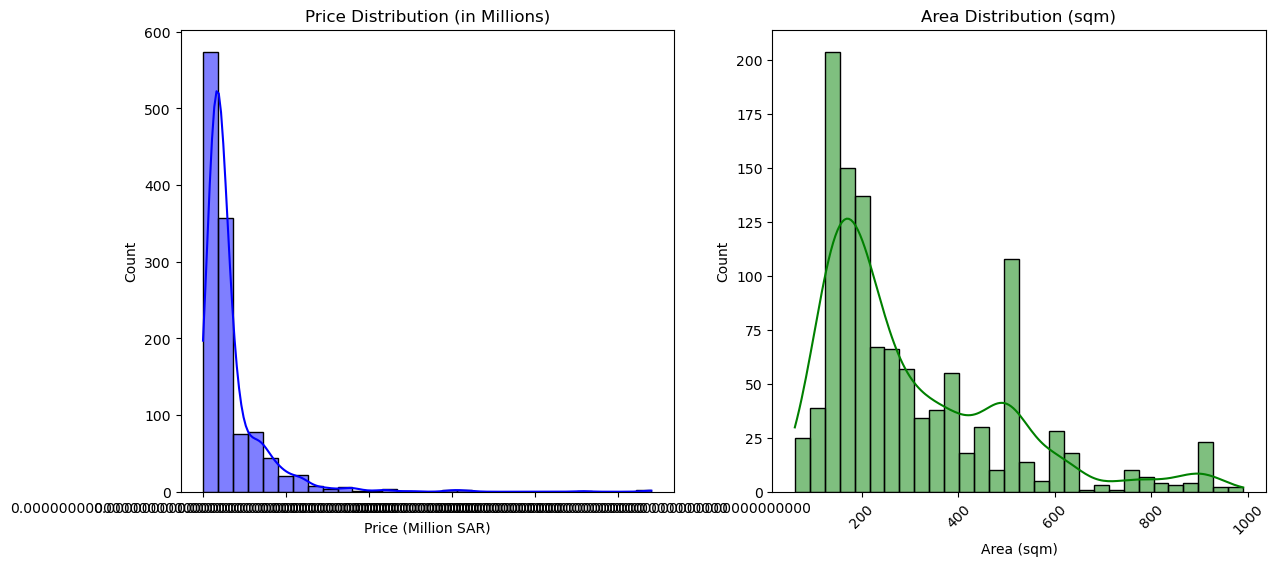

In [81]:
# Check if the 'Price' column exists before processing
if 'Price' in df.columns:
    # Remove commas from the 'Price' column and convert it to numeric, then divide by 1,000,000 to convert to Million SAR
    df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', '', regex=True), errors='coerce') / 1_000_000  # Convert to Million SAR

# Check if the 'Area' column exists before processing
if 'Area' in df.columns:
    # Remove ' م2' from the 'Area' column and convert it to numeric
    df['Area'] = pd.to_numeric(df['Area'].astype(str).str.replace(' م2', '', regex=True), errors='coerce')

# Check for any non-numeric values after conversion
print(f"Non-numeric Price values: {df['Price'].isna().sum()} missing values")
print(f"Non-numeric Area values: {df['Area'].isna().sum()} missing values")

# Plot the distributions with adjusted axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of Price with X-axis formatting
sns.histplot(df['Price'].dropna(), bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Price Distribution (in Millions)")
axes[0].set_xlabel("Price (Million SAR)")  # Labeling the X-axis
axes[0].ticklabel_format(style='plain', axis='x')  # Removing scientific notation from the X-axis

# Plot the distribution of Area with X-axis label rotation for readability
sns.histplot(df['Area'].dropna(), bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Area Distribution (sqm)")
axes[1].set_xlabel("Area (sqm)")
axes[1].ticklabel_format(style='plain', axis='x')  # Removing scientific notation from the X-axis
axes[1].tick_params(axis='x', rotation=45)  # Rotating X-axis labels to prevent overlap

# Display the plots
plt.show() 

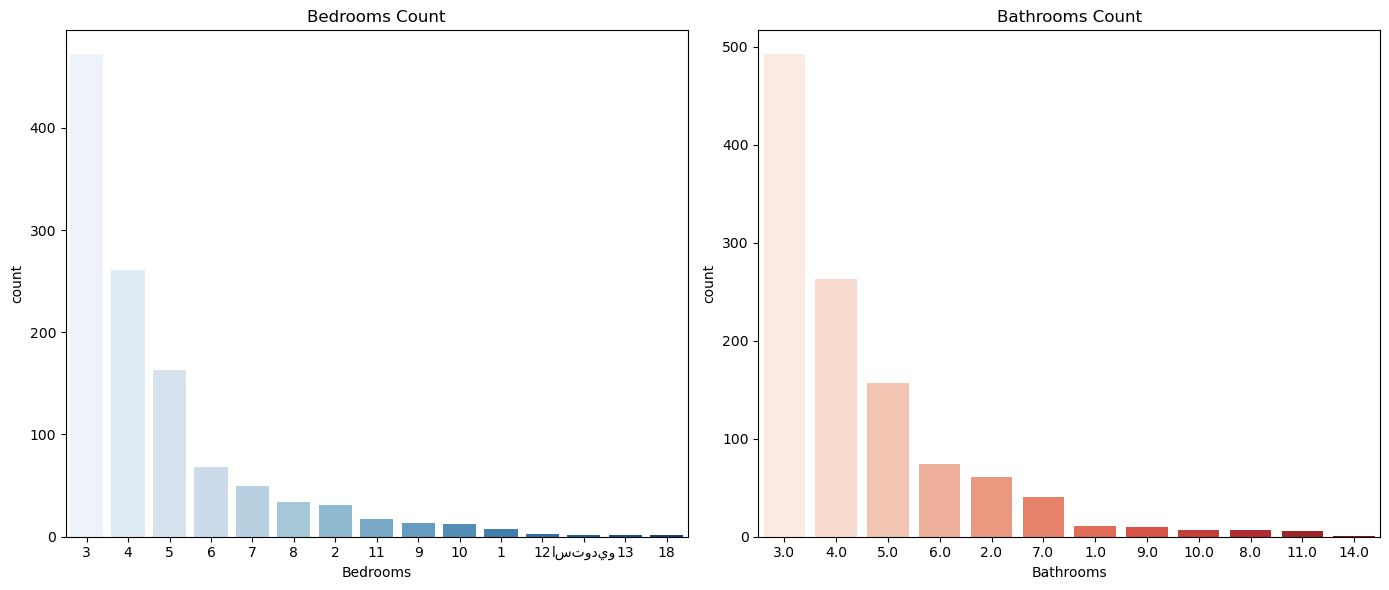

In [83]:
# Plot the distribution of Bedrooms and Bathrooms in separate plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the count distribution for Bedrooms
sns.countplot(x=df['Bedrooms'], order=df['Bedrooms'].value_counts().index, ax=axes[0], palette="Blues")

# Add a title to the plot
axes[0].set_title("Bedrooms Count")  

# Plot the count distribution for Bathrooms
sns.countplot(x=df['Bathrooms'], order=df['Bathrooms'].value_counts().index, ax=axes[1], palette="Reds")

# Add a title to the plot
axes[1].set_title("Bathrooms Count")  

# Adjust layout to prevent overlap and ensure good spacing
plt.tight_layout()

# Display the plots
plt.show()  


In [ ]:
# The "استوديو" value should be removed from the Bedrooms column as it is not a valid bedroom count

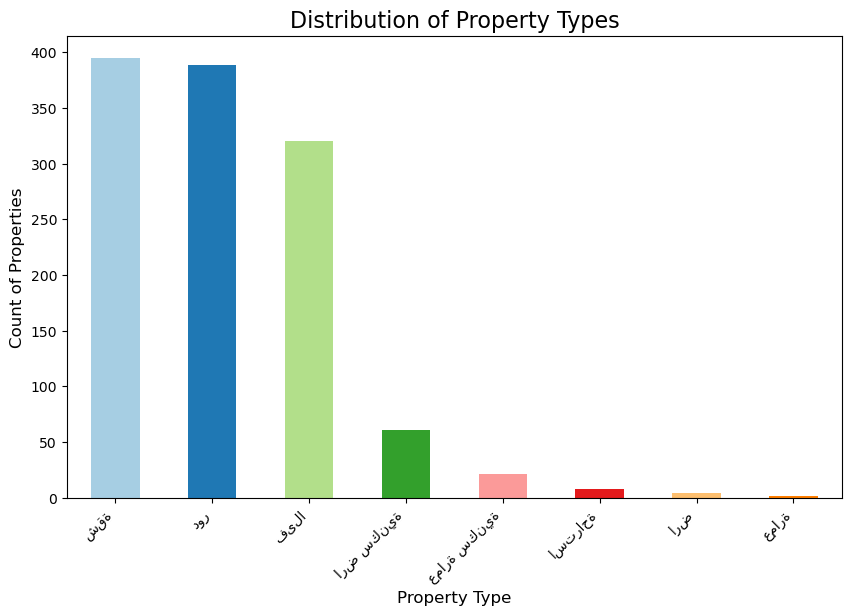

In [21]:
# Count the number of properties by original Property Type
property_type_count = df['Property Type'].value_counts()

# Plot a bar chart for property type distribution 
plt.figure(figsize=(10, 6))
property_type_count.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title to the plot
plt.title('Distribution of Property Types', fontsize=16)

# Title and labels
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [ ]:
# The order of Property Types in the chart is:
# - شقة
# - دور
# - فيلا
# - ارض سكنية
# - عمارة سكنية
# - استراحة
# - ارض
# - عمارة
# "ارض" and "ارض سكنية" are considered duplicates and should be combined under the name "ارض".
# Similarly, "عمارة" and "عمارة سكنية" should be treated as the same and combined under "عمارة".

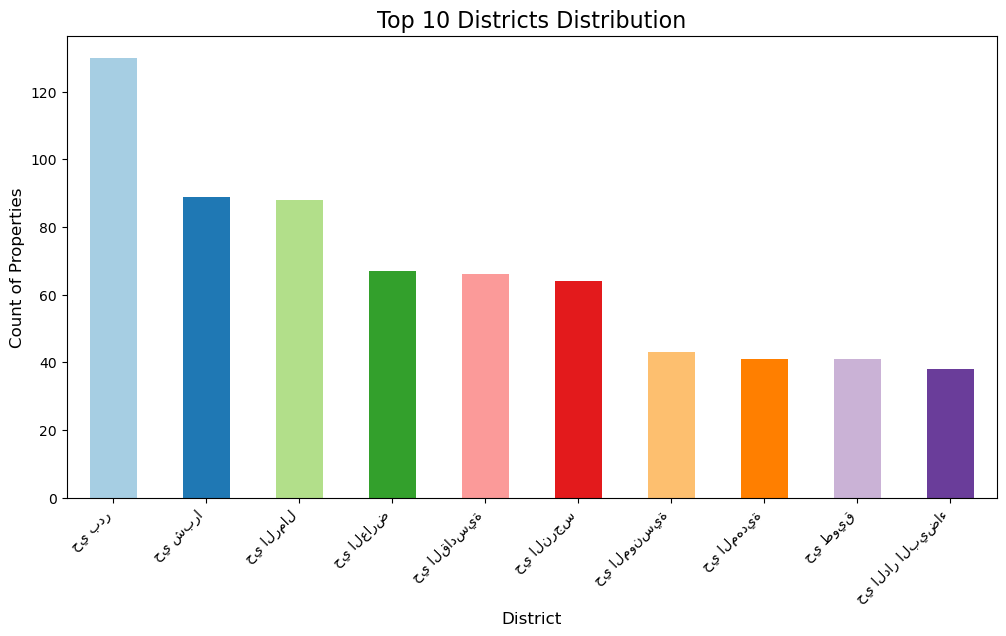

In [25]:
# Count the number of properties in each District
district_distribution = df['District'].value_counts()

# Select top 10 most frequent districts
top_districts = district_distribution.head(10)

# Plot a bar chart for District distribution (Top 10)
plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title to the plot
plt.title('Top 10 Districts Distribution', fontsize=16)

# Title and labels
plt.xlabel('District', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [ ]:
# The order of the top 10 District in the chart is:
# - حي بدر
# - حي شبرا
# - حي الرمال
# - حي العارض
# - حي القادسية
# - حي النرجس
# - حي المونسية
# - حي المهدية
# - حي طويق
# - حي الدار البيضاء

In [23]:
# Number of unique districts
num_districts = df['District'].nunique()

# Display the result
print(f'The number of unique districts is: {num_districts}')

The number of unique districts is: 108


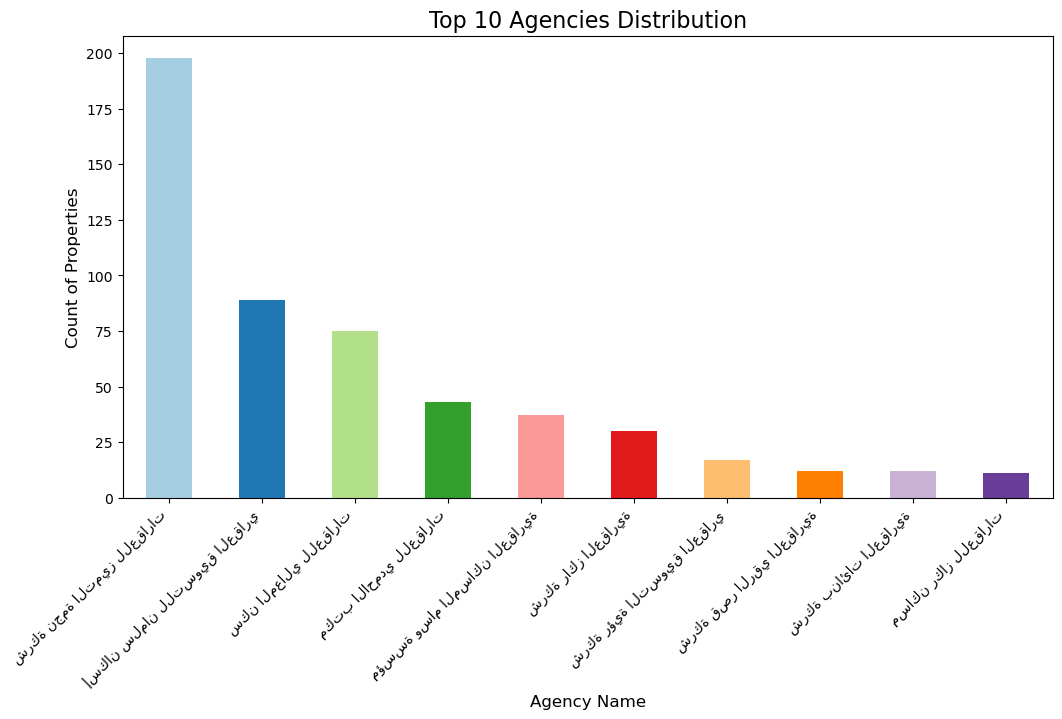

In [11]:
# Count the number of properties for each Agency
agency_distribution = df['Agency_Name'].value_counts()

# Select top 10 most frequent agencies
top_agencies = agency_distribution.head(10)

# Plot a bar chart for Agency distribution (Top 10)
plt.figure(figsize=(12, 6))
top_agencies.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title to the plot
plt.title('Top 10 Agencies Distribution', fontsize=16)

# Title and labels
plt.xlabel('Agency Name', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [ ]:
# The order of the top 10 Agencies in the chart is:
# - شركة نجمة التميز للعقارات
# - اسكان سلمان للتسويق العقاري
# - سكن المعالي للعقارات
# - مكتب الاحمدي للعقارات
# - مؤسسة وسام المساكن العقارية
# - شركة راكز العقارية
# - شركة رؤية التسويق العقاري
# - شركة قصر الرقي العقارية
# - شركة بنائات العقارية
# - مساكن ركاز للعقارات

In [19]:
# Number of unique agencies
num_Agency = df['Agency_Name'].nunique()

# Display the result
print(f'The number of unique agencies is: {num_Agency}')

The number of unique districts is: 151
